In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

covid_data.drop(columns = ['fips', 'county'], inplace = True) # Remove columns fips and county  
covid_data.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0


In [3]:
# RETRIEVE COVID-19 DATA from 2021-01 to 2021-12-31
covid_data_2021 = covid_data[(covid_data['date'] < '2022-01-01') & (covid_data['date'] > '2020-12-31')]

covid_data_2021.head()

,date,state,cases,deaths
884737,2021-01-01,Alabama,4239,50.0
884738,2021-01-01,Alabama,13823,169.0
884739,2021-01-01,Alabama,1517,33.0
884740,2021-01-01,Alabama,1854,46.0
884741,2021-01-01,Alabama,4693,63.0


In [4]:
# FIND TOTAL AMOUNT of CASES EACH DAY IN 2021
covid_data_2021_by_date = covid_data_2021.groupby('date')['cases', 'deaths'].sum().reset_index()
covid_data_2021_by_date.astype({'cases': int, 'deaths': int})

covid_data_2021_by_date.head()

/var/folders/q7/c9bgzbcx2d3609pccd6322ph0000gn/T/ipykernel_75422/1985686686.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_data_2021_by_date = covid_data_2021.groupby('date')['cases', 'deaths'].sum().reset_index()


,date,cases,deaths
0,2021-01-01,20172049,347970.0
1,2021-01-02,20463659,350343.0
2,2021-01-03,20665439,351694.0
3,2021-01-04,20917269,353743.0
4,2021-01-05,21152285,357432.0


In [5]:
# ASSIGN EACH DATE a VALUE, STARTING with the INITIAL DATE at 1
x = pd.Series(range(1, len(covid_data_2021_by_date['date']) + 1))[:, np.newaxis]

y_cases = covid_data_2021_by_date['cases']
y_deaths = covid_data_2021_by_date['deaths']

/var/folders/q7/c9bgzbcx2d3609pccd6322ph0000gn/T/ipykernel_75422/3811471065.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = pd.Series(range(1, len(covid_data_2021_by_date['date']) + 1))[:, np.newaxis]


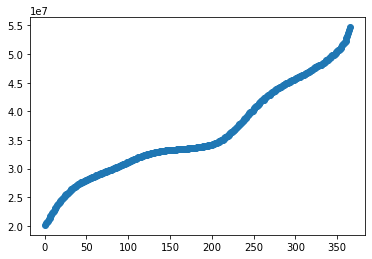

In [6]:
# SCATTER PLOT of COVID CASES IN 2021
plt.scatter(x, y_cases)

In [8]:
from sklearn.linear_model import LinearRegression

# CREATING LINEAR MODEL FOR COVID CASES IN 2021
model = LinearRegression(fit_intercept = True)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y_cases, cv = 4)
scores.mean()

# The model is not good fit

-0.5579122837236938

In [9]:
# LINEAR REGRESSION MODEL FOR COVID DEATHS IN 2021
model = LinearRegression(fit_intercept = True)

# IMPLEMENTING a 2 FOLD CROSS VALIDATION and CALCULATING THE MEAN ACCURACY SCORE
scores = cross_val_score(model, x, y_deaths, cv = 2)
scores.mean()

-0.016876612775877098

In [10]:
# DETERMINE Y-INTERCEPT and SLOPE FOR COVID DEATHS IN 2021
model.fit(x, y_deaths)

xfit = np.linspace(0, 350, 35)
yfit = model.predict(xfit[:, np.newaxis])

print(model.intercept_, model.coef_)

423895.7153545085 [1036.98031133]


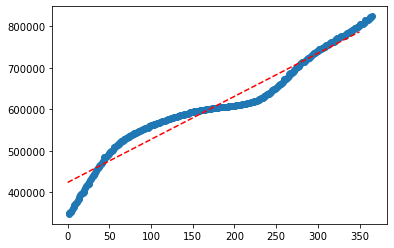

In [11]:
# SCATTER PLOT of COVID DEATHS IN 2021 WITH THE LINE OF BEST FIT

plt.plot(xfit, yfit, '--r')
plt.scatter(x, y_deaths)